<a href="https://colab.research.google.com/github/sakshisinghal936/House_Price_prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Data read

In [1]:
! pip install -q kaggle

In [2]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [3]:
! kaggle datasets download -d shree1992/housedata

Dataset URL: https://www.kaggle.com/datasets/shree1992/housedata
License(s): unknown
  0% 0.00/432k [00:00<?, ?B/s]
100% 432k/432k [00:00<00:00, 1.02GB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/housedata.zip',  'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import pandas as pd
df = pd.read_csv("/content/data.csv")
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


# Data understanding

In [6]:
df.shape

(4600, 18)

In [7]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [8]:
df.dtypes

,0
date,object
price,float64
bedrooms,float64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64
condition,int64


In [9]:
df["city"].nunique()

44

In [10]:
df["country"].unique()

array(['USA'], dtype=object)

In [11]:
df = df.drop(['date', 'country', "street", "statezip"], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond


<Axes: ylabel='Frequency'>

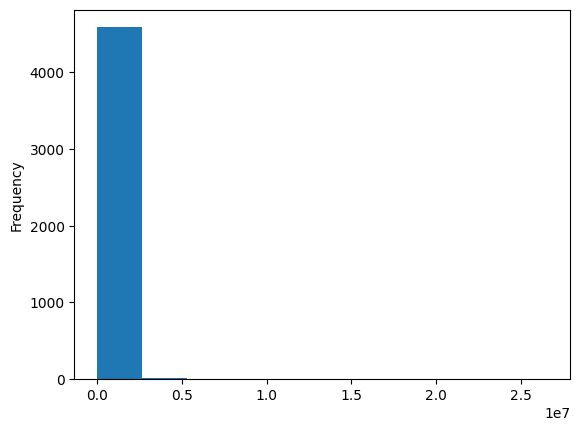

In [12]:
df["price"].plot(kind = "hist")

In [13]:
price_frequency = pd.cut(df['price'], bins=10, right=False).value_counts().sort_index()
display(price_frequency)


,count
price,
"[0.0, 2659000.0)",4585
"[2659000.0, 5318000.0)",12
"[5318000.0, 7977000.0)",1
"[7977000.0, 10636000.0)",0
"[10636000.0, 13295000.0)",1
"[13295000.0, 15954000.0)",0
"[15954000.0, 18613000.0)",0
"[18613000.0, 21272000.0)",0
"[21272000.0, 23931000.0)",0


<Axes: >

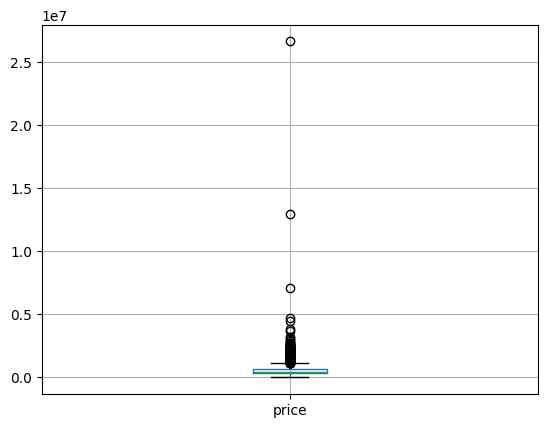

In [14]:
df.boxplot(column='price')

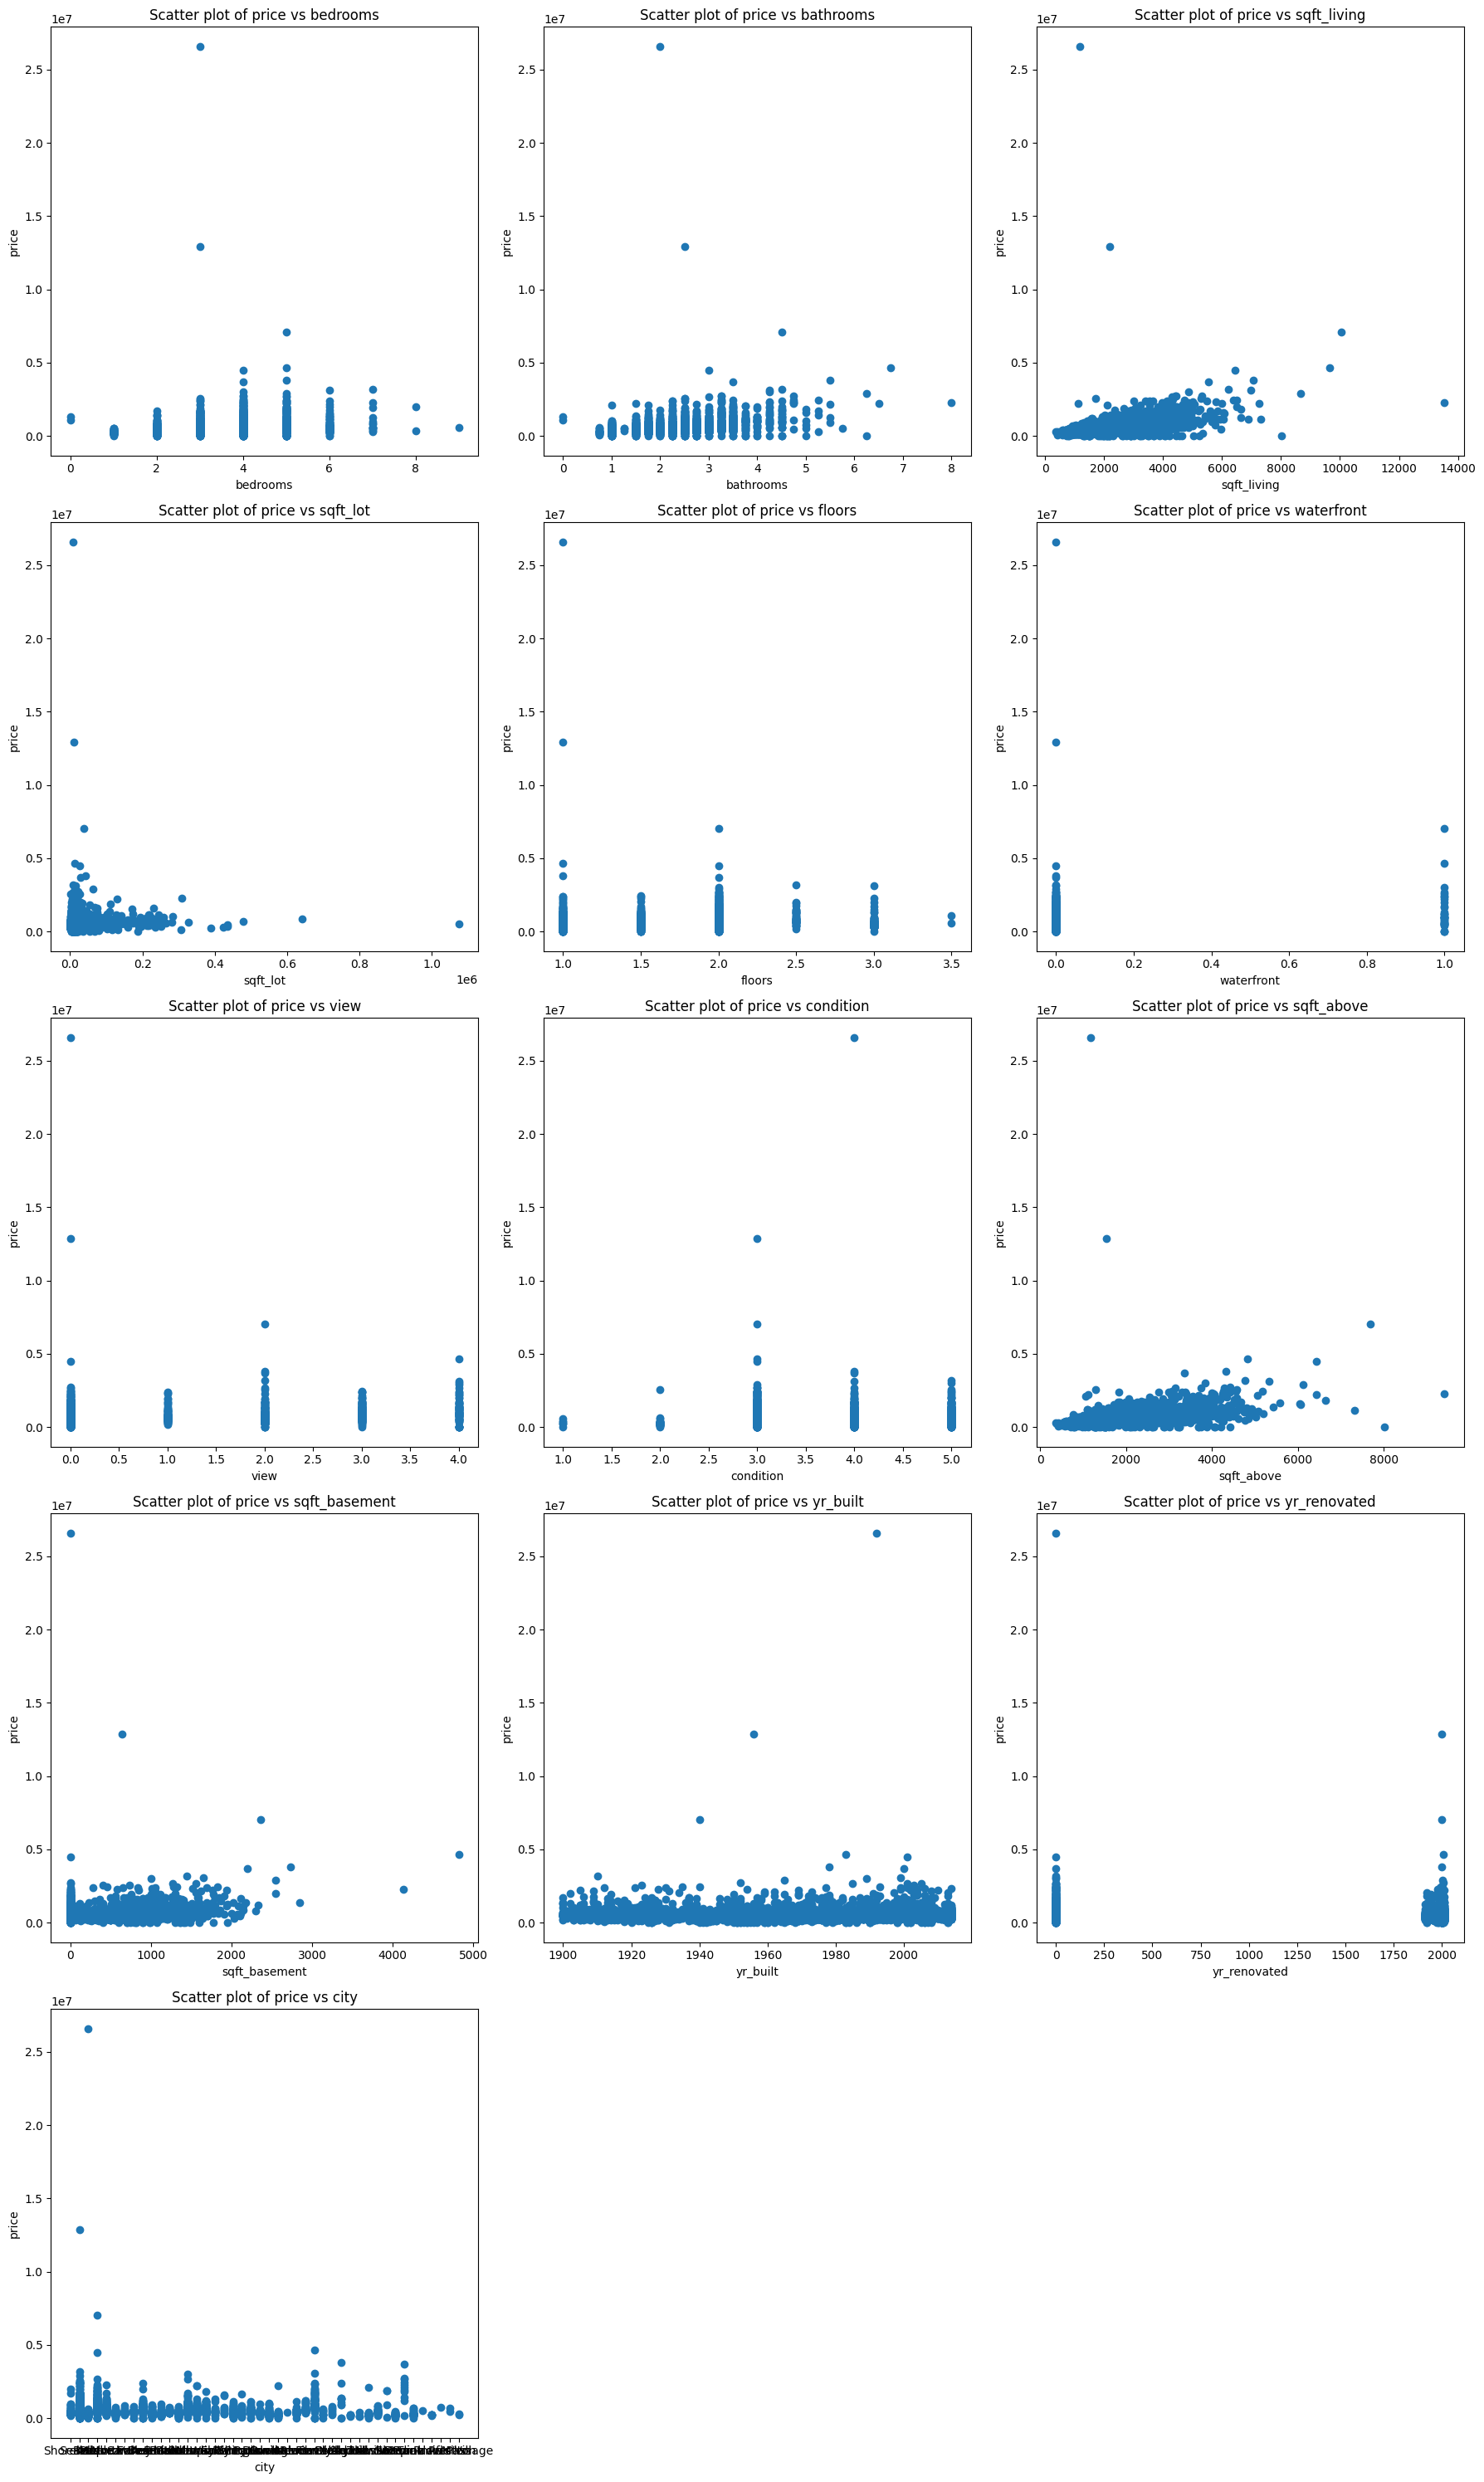

In [15]:
import matplotlib.pyplot as plt

# Get all column names except 'price'
columns_to_plot = df.columns.drop('price')

# Determine the number of rows needed
n_columns = len(columns_to_plot)
n_rows = (n_columns + 2) // 3  # Integer division to get the number of rows, rounding up

# Create scatter plots in subplots
fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows * 6)) # Adjust figure size as needed
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, column in enumerate(columns_to_plot):
    axes[i].scatter(df[column], df['price'])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('price')
    axes[i].set_title(f'Scatter plot of price vs {column}')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

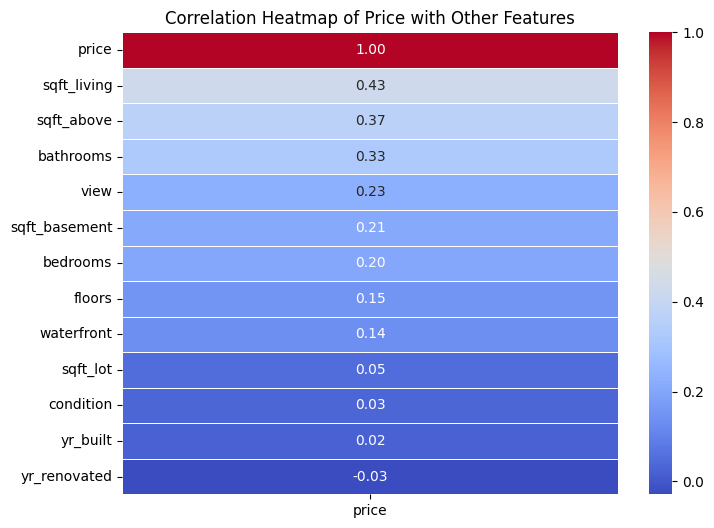

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the 'city' column before calculating correlation
df_numerical = df.drop('city', axis=1)

# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Get correlations with the 'price' column
price_correlations = correlation_matrix[['price']].sort_values(by='price', ascending=False)

# Create a heatmap of correlations with 'price'
plt.figure(figsize=(8, 6))
sns.heatmap(price_correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Price with Other Features')
plt.show()

# Data Cleaning

In [17]:
print(df.isnull().sum())

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
city             0
dtype: int64


In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df_cleaned = df[df["price"] <= 2659000]

In [20]:
price_frequency = pd.cut(df_cleaned['price'], bins=10, right=False).value_counts().sort_index()
display(price_frequency)

,count
price,
"[0.0, 256049.833)",617
"[256049.833, 512099.667)",2034
"[512099.667, 768149.5)",1198
"[768149.5, 1024199.333)",424
"[1024199.333, 1280249.167)",148
"[1280249.167, 1536299.0)",68
"[1536299.0, 1792348.833)",43
"[1792348.833, 2048398.667)",23
"[2048398.667, 2304448.5)",16


<Axes: >

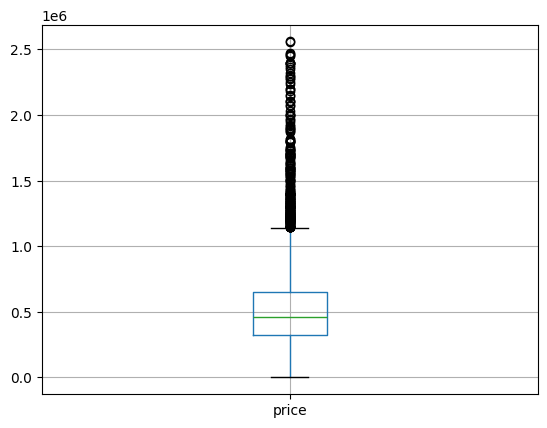

In [21]:
df_cleaned.boxplot(column='price')

In [22]:
Q1 = df_cleaned["price"].quantile(0.25)
Q3 = df_cleaned["price"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned_ = df_cleaned[(df_cleaned["price"] >= lower_bound) & (df_cleaned["price"] <= upper_bound)].reset_index(drop=True)

print("Original shape:", df_cleaned.shape)
print("After removing outliers:", df_cleaned_.shape)

Original shape: (4585, 14)
After removing outliers: (4350, 14)


# Feature Engineering

In [23]:
df_cleaned_.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
2,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
3,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond
4,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,Seattle


In [24]:
df_cleaned_["house_age"] = df_cleaned_["yr_built"].apply(lambda x: 2025 - x)
df_cleaned_["renovated_age"]= df_cleaned_.apply(lambda x: 2025 - x["yr_renovated"] if x["yr_renovated"] >0  else x["house_age"], axis=1)
df_cleaned_.drop(["yr_built", "yr_renovated"], axis=1, inplace=True)

In [25]:
df_cleaned_["has_basement"]= df_cleaned_["sqft_basement"].apply(lambda x : 1 if x > 0 else 0)

In [26]:
df_cleaned_.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,house_age,renovated_age,has_basement
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,70,20,0
1,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,59,59,0
2,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,62,62,1
3,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,49,33,1
4,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,Seattle,87,31,0


# Train-Test Split

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split

X = df_cleaned_.drop("price", axis=1)
Y = df_cleaned_["price"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Encoding Categorical

In [28]:
# Calculate the mean of the target variable ('price') for each city in the training data
city_target_means = Y_train.groupby(X_train['city']).mean()

# Map the target means to the 'city' column in both training and testing sets
X_train['city_te'] = X_train['city'].map(city_target_means)
X_test['city_te'] = X_test['city'].map(city_target_means)

# Handle potential NaNs in the test set (cities not present in the training set)
# We can fill these with the overall mean of the target variable in the training set
X_test['city_te'].fillna(Y_train.mean(), inplace=True)

X_train.drop(columns = ["city"], inplace=True)
X_test.drop(columns = ["city"], inplace=True)

display(X_train.head())

/tmp/ipython-input-2913823508.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['city_te'].fillna(Y_train.mean(), inplace=True)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,house_age,renovated_age,has_basement,city_te
322,4.0,1.75,2060,26036,1.0,0,0,4,1160,900,78,37,1,442041.666667
805,2.0,2.50,1310,1500,2.0,0,0,3,1160,150,19,19,1,503011.615754
2481,4.0,3.25,3450,6184,2.0,0,0,3,3450,0,11,11,0,656051.950763
915,3.0,1.75,1570,7775,2.0,0,0,3,1570,0,43,43,0,298536.760686
1041,4.0,2.50,2340,6420,1.0,0,2,3,1590,750,61,25,1,388911.631463


# Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_array_train = scaler.fit_transform(X_train)
scaled_array_test = scaler.fit_transform(X_test)

X_train_scaled = pd.DataFrame(scaled_array_train, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaled_array_test, columns=X_test.columns, index=X_test.index)

# Model Training

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model = LinearRegression()
model.fit(X_train_scaled, Y_train)
y_pred = model.predict(X_test_scaled)

# Model check

In [32]:
residuals = Y_test - y_pred

In [33]:
residuals.describe()

,price
count,870.000000
mean,2409.294021
std,143336.677075
min,-934706.980298
25%,-63740.164045
50%,-1553.007560
75%,62610.554774
max,572694.384488


<Axes: ylabel='Frequency'>

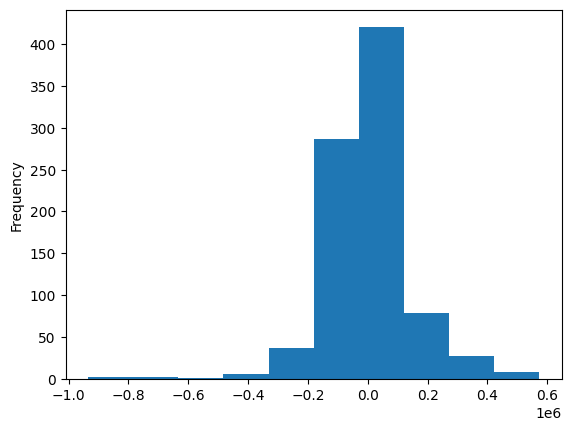

In [34]:
residuals.plot(kind="hist")

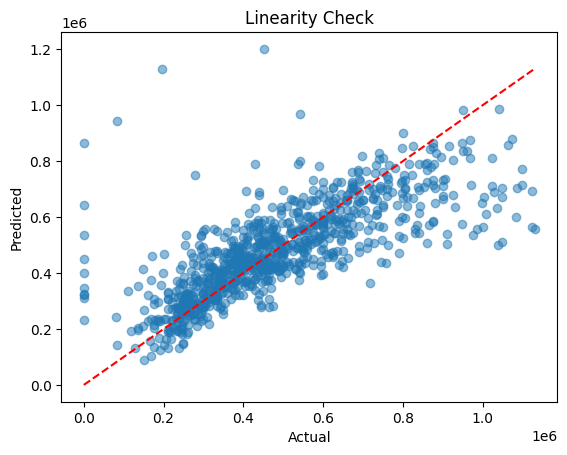

In [35]:
plt.scatter(Y_test, y_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linearity Check")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
y_pred_train = model.predict(X_train_scaled)
y_pred_test  = model.predict(X_test_scaled)

# Train performance
print("---- Training Performance ----")
print("R²:", r2_score(Y_train, y_pred_train))
print("RMSE:", np.sqrt(mean_squared_error(Y_train, y_pred_train)))
print("MAE:", mean_absolute_error(Y_train, y_pred_train))

# Test performance
print("\n---- Test Performance ----")
print("R²:", r2_score(Y_test, y_pred_test))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, y_pred_test)))
print("MAE:", mean_absolute_error(Y_test, y_pred_test))

---- Training Performance ----
R²: 0.5828579052687682
RMSE: 141277.77701382933
MAE: 94013.3067618067

---- Test Performance ----
R²: 0.5642717469134445
RMSE: 143274.53467640936
MAE: 95169.91925764817


In [37]:
coef = pd.Series(model.coef_, index=X_train.columns)

# Print sorted coefficients
print("\nModel Coefficients:\n", coef.sort_values())


Model Coefficients:
 bedrooms        -13740.702639
renovated_age    -5656.717452
waterfront       -5428.490405
sqft_basement     1532.057849
sqft_lot          2591.479380
bathrooms        11655.150593
condition        15430.542491
view             18078.597952
has_basement     27759.858906
floors           29574.948542
house_age        37966.927553
sqft_living      54237.953512
sqft_above       56562.534956
city_te          95454.857637
dtype: float64


# Cross Validation

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

lr = LinearRegression()
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Cross-validation with R²
r2_scores = cross_val_score(lr, X_train_scaled, Y_train, cv=cv, scoring="r2")
print("CV R² per fold:", r2_scores)
print("Mean CV R²:", np.mean(r2_scores))
print("--------------")
# Cross-validation with RMSE
rmse_scores = cross_val_score(lr, X_train_scaled, Y_train, cv=cv,scoring="neg_root_mean_squared_error")
print("CV RMSE per fold:", -rmse_scores)
print("Mean CV RMSE:", -np.mean(rmse_scores))


CV R² per fold: [0.5775136  0.59250971 0.64556014 0.5658864  0.6179751  0.64300301
 0.60015867 0.37485021 0.61608641 0.51604676]
Mean CV R²: 0.5749590009306169
--------------
CV RMSE per fold: [136969.34051336 142051.80884343 122592.39270039 139015.16681853
 131955.54829586 133047.81933004 142724.50838298 176329.3114347
 136755.73703178 157923.05980671]
Mean CV RMSE: 141936.4693157784


# Regularized Models

## Ridge

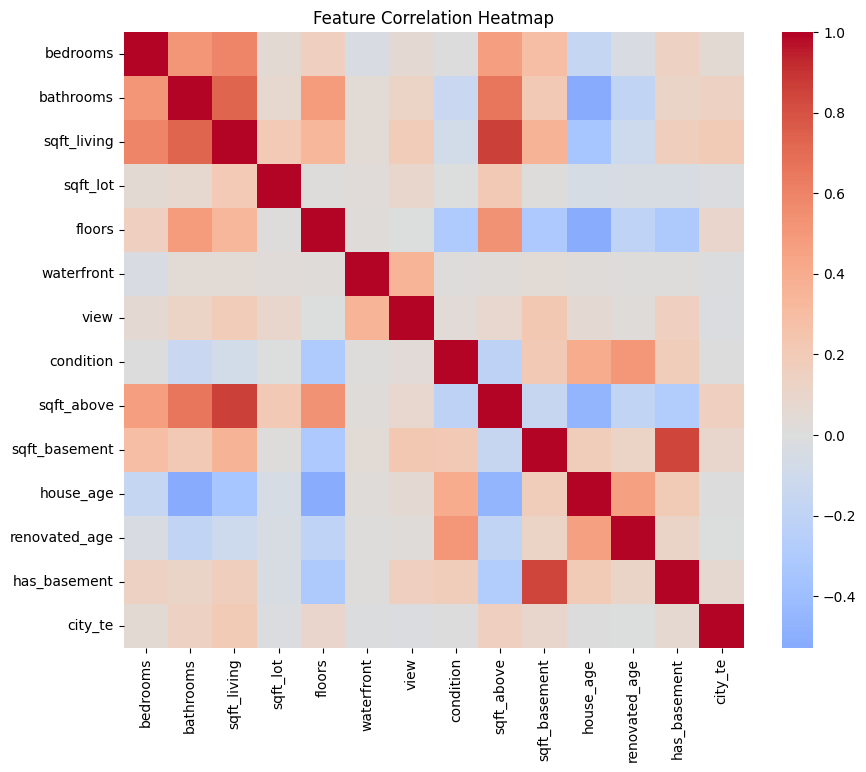

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = pd.DataFrame(X_train_scaled, columns=X_train.columns).corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

In [40]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Ridge
ridge = Ridge(alpha=10)
ridge.fit(X_train_scaled, Y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

print("Ridge R²:", r2_score(Y_test, y_pred_ridge))
print("Ridge RMSE:", np.sqrt(mean_squared_error(Y_test, y_pred_ridge)))

Ridge R²: 0.5642487256225248
Ridge RMSE: 143278.3195138114


In [41]:
coef = pd.Series(ridge.coef_, index=X_train.columns)

# Print sorted coefficients
print("\nRidge Coefficients:\n", coef.sort_values())


Ridge Coefficients:
 bedrooms        -13581.980358
renovated_age    -5534.412413
waterfront       -5393.883772
sqft_basement     1796.058368
sqft_lot          2627.178130
bathrooms        11761.607291
condition        15345.611243
view             18042.895527
has_basement     27408.421967
floors           29475.324187
house_age        37721.171846
sqft_living      54109.765716
sqft_above       56283.319209
city_te          95241.679225
dtype: float64


Feature are not multicollinear, so Ridge(regularized model would not help much)

## Lasso

In [42]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lasso = Lasso(alpha=100, max_iter=5000)
lasso.fit(X_train_scaled, Y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

print("Lasso R²:", r2_score(Y_test, y_pred_lasso))
print("Lasso RMSE:", np.sqrt(mean_squared_error(Y_test, y_pred_lasso)))

Lasso R²: 0.5641979578630109
Lasso RMSE: 143286.66568265168


In [43]:
coef = pd.Series(lasso.coef_, index=X_train.columns)

# Print sorted coefficients
print("\nLasso Coefficients:\n", coef.sort_values())


Lasso Coefficients:
 bedrooms        -13486.274260
renovated_age    -5372.040780
waterfront       -5268.569261
sqft_basement       -0.000000
sqft_lot          2515.899015
bathrooms        11447.082576
condition        15213.104199
view             17967.966119
has_basement     27359.317483
floors           29442.126701
house_age        37614.251400
sqft_above       52928.348195
sqft_living      57872.896761
city_te          95418.475793
dtype: float64


## Cross Validation to Fine tune alpha

In [44]:
from sklearn.linear_model import LassoCV, RidgeCV

lasso_cv = LassoCV(alphas=[0.001,0.01,0.1,1,10], cv=5, max_iter=5000)
lasso_cv.fit(X_train_scaled, Y_train)
lasso_cv_pred = lasso_cv.predict(X_test_scaled)
print("Best alpha (Lasso):", lasso_cv.alpha_)
print("Lasso R²:", r2_score(Y_test, lasso_cv_pred))
print("Lasso RMSE:", np.sqrt(mean_squared_error(Y_test, lasso_cv_pred)))
print("----------------")

ridge_cv = RidgeCV(alphas=[0.001,0.01,0.1,1,10,100], cv=5)
ridge_cv.fit(X_train_scaled, Y_train)
ridge_cv_pred = ridge_cv.predict(X_test_scaled)
print("Best alpha (Ridge):", ridge_cv.alpha_)
print("Ridge R²:", r2_score(Y_test, ridge_cv_pred))
print("Ridge RMSE:", np.sqrt(mean_squared_error(Y_test, ridge_cv_pred)))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68093455486.65625, tolerance: 13431132324.865398
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66405369582.21875, tolerance: 13431132324.865398
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66241004523.82031, tolerance: 13431132324.865398
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: Convergence

Best alpha (Lasso): 10.0
Lasso R²: 0.5639995633626536
Lasso RMSE: 143319.27687893438
----------------
Best alpha (Ridge): 100.0
Ridge R²: 0.5637896219974412
Ridge RMSE: 143353.7780180949


# Decision Tree Regressor

Trees don't need scaling, so we are using X_train and X_test instead of scaled data.

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, Y_train)

y_pred = dt.predict(X_test)

print("R² Score:", r2_score(Y_train, dt.predict(X_train)))
print("RMSE:", np.sqrt(mean_squared_error(Y_train, dt.predict(X_train))))
print("MAE:", mean_absolute_error(Y_train, dt.predict(X_train)))
print("-------------")
print("Decision Tree Results:")
print("R² Score:", r2_score(Y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, y_pred)))
print("MAE:", mean_absolute_error(Y_test, y_pred))

R² Score: 0.9999885533088615
RMSE: 740.0683410505326
MAE: 23.563218390804597
-------------
Decision Tree Results:
R² Score: 0.16793581685751235
RMSE: 197988.31524555
MAE: 132221.52293849885


model is just “remembering” the training set, not “learning patterns.”

## Regularized model

In [46]:
dt = DecisionTreeRegressor(
    max_depth=6,           # limit depth
    min_samples_leaf=10,   # min samples per leaf
    min_samples_split=20,  # min samples to split
    ccp_alpha=0.001,       # pruning strength
    random_state=42
)
dt.fit(X_train, Y_train)
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

print("Train R²:", r2_score(Y_train, y_pred_train))
print("Test R²:", r2_score(Y_test, y_pred_test))

Train R²: 0.64434656192905
Test R²: 0.5493096641895296


## Cross Validation in Decision Trees

In [47]:
param_grid = {
    "max_depth": [4, 6, 8, 10, None],
    "min_samples_leaf": [1, 5, 10, 20, 50],
    "min_samples_split": [2, 10, 20, 40, 80],
    "ccp_alpha": [0.0, 1e-5, 1e-4, 1e-3, 1e-2],
}
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=cv,
    scoring="neg_root_mean_squared_error",
)
grid.fit(X_train, Y_train)

print("Best params:", grid.best_params_)
print("Best CV RMSE:", -grid.best_score_)
best_tree = grid.best_estimator_

Best params: {'ccp_alpha': 0.0, 'max_depth': 8, 'min_samples_leaf': 20, 'min_samples_split': 80}
Best CV RMSE: 142252.91112963945


In [48]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_pred = best_tree.predict(X_test)
print("Test R²:", r2_score(Y_test, y_pred))
print("Test RMSE:",  np.sqrt(mean_squared_error(Y_test, y_pred)))
print("Test MAE:", mean_absolute_error(Y_test, y_pred))

Test R²: 0.565301561005097
Test RMSE: 143105.12471076488
Test MAE: 98065.83344461284


In [49]:
dt = DecisionTreeRegressor(
    max_depth=8,           # limit depth
    min_samples_leaf=20,   # min samples per leaf
    min_samples_split=80,  # min samples to split
    ccp_alpha=0.0,       # pruning strength
    random_state=42
)
dt.fit(X_train, Y_train)
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

print("Train R²:", r2_score(Y_train, y_pred_train))
print("Test R²:", r2_score(Y_test, y_pred_test))

Train R²: 0.6557749587792554
Test R²: 0.565301561005097


# Bagging

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Train Random Forest
rf = RandomForestRegressor(
    n_estimators=300,      # number of trees
    max_depth=None,        # let trees grow fully (can tune later)
    min_samples_leaf=3,    # prevents overfitting
    max_features="sqrt",   # feature sampling per split
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)

In [51]:
print("Random Forest Results:")
print("R² Score train:", r2_score(Y_train, rf.predict(X_train)))
print("R² Score:", r2_score(Y_test, y_pred_rf))
print("RMSE:",np.sqrt(mean_squared_error(Y_test, y_pred_rf)))
print("MAE:", mean_absolute_error(Y_test, y_pred_rf))

Random Forest Results:
R² Score train: 0.8234098757330955
R² Score: 0.6090466493647813
RMSE: 135713.6765612937
MAE: 91005.55625671864


# Boosting

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting
gb = GradientBoostingRegressor(
    n_estimators=300,      # number of boosting stages
    learning_rate=0.05,    # step size
    max_depth=3,           # depth of each tree
    subsample=0.9,         # stochastic boosting
    random_state=42
)

gb.fit(X_train, Y_train)
y_pred_gb = gb.predict(X_test)

In [53]:
print("\nGradient Boosting Results:")
print("R² Score:", r2_score(Y_test, y_pred_gb))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, y_pred_gb)))
print("MAE:", mean_absolute_error(Y_test, y_pred_gb))


Gradient Boosting Results:
R² Score: 0.6078144701465044
RMSE: 135927.37471477577
MAE: 90576.8320984504


In [54]:
pip install Xgboost

In [57]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=500,        # number of boosting rounds (trees)
    learning_rate=0.05,      # shrinkage step
    max_depth=6,             # depth of trees
    subsample=0.8,           # row sampling
    colsample_bytree=0.8,    # feature sampling
    reg_lambda=1.0,          # L2 regularization
    reg_alpha=0.0,           # L1 regularization
    random_state=42,
    n_jobs=-1
)
xgb.fit(X_train, Y_train)

# Predict on test
y_pred_xgb = xgb.predict(X_test)

In [58]:
print("XGBoost Results:")
print("R² Score:", r2_score(Y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, y_pred_xgb)))
print("MAE:", mean_absolute_error(Y_test, y_pred_xgb))

XGBoost Results:
R² Score: 0.5984085316601353
RMSE: 137547.71657029475
MAE: 90663.70055374023
